In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Checking Null Values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Handling Categorical Null Values 
data['Gender'].fillna(data['Gender'].mode()[0],
                      inplace = True)
data['Married'].fillna(data['Married'].mode()[0],
                       inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0],
                         inplace = True)
data['Education'].fillna(data['Education'].mode()[0],
                         inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],
                             inplace = True)

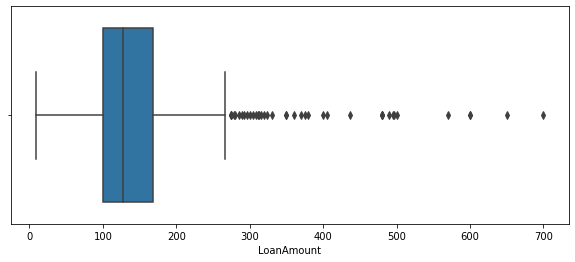

In [ ]:
plt.figure(figsize = (10,4))
sns.boxplot(x = 'LoanAmount',
            data = data,
            orient = 'horizontal')
plt.show()

In [ ]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),
                          inplace = True)

In [ ]:
# Converting the categories into numbers using map function.
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].map({'No': 0, 'Yes': 1})
data['Dependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})

In [ ]:
#scaling the values-Min Max scaler
for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [ ]:
X = data.iloc[:,1:12].values
y = data.iloc[:,12].values

In [ ]:
X

array([[0.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       ...,
       [0.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 1.        , 0.66666667, ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.74358974, 0.        ,
        0.5       ]])

In [ ]:
y

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0.

In [ ]:
#Steps to build Neural Network
#Creating training and validation data
# Testing Data - 10%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=data['Loan_Status'], random_state = 42)
# Train & Valid Data - 90%
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state = 42)

In [ ]:
# Creating a skeleton of model.
from keras.models import Sequential
# Defining layers
from keras.layers import Input, Dense
from tensorflow.keras.layers import InputLayer

In [ ]:
# Input neurons
input_neurons = X_train.shape[1]
# Output neurons (Since it is binary classification)
output_neurons = 1
# Defining hidden layers & neurons in each layersnumber_of_hidden_layers = 2
neuron_hidden_layer_1         = 20
neuron_hidden_layer_2         = 15
neuron_hidden_layer_3         = 10
neuron_hidden_layer_4         = 5
# Defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_4, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [ ]:
#compiling the model
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
#Training the model
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

In [ ]:
# Getting predictions for the test set
y_predict = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
# Getting accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy_Score : {}".format(accuracy_score(y_predict, y_test) * 265))

Accuracy_Score : 81.20967741935485
